In [32]:
library(dplyr)
library(ggplot2)

In [33]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
df = read.table(myfilename, header = T)
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur3"
head(df)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,U_Neur1,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [34]:
#### both treated and untreated day 52 cells

In [35]:
df1 = df

In [36]:
df_tot_d52_mid = df[df$celltype %in% c("DA","Sert"),] %>% group_by(donor_id,pool_id) %>% 
                                                        summarize(total_midbrain_cells = sum(n_cells))

In [37]:
df_tot_d52 = df2 %>% group_by(donor_id,pool_id) %>% summarize(total_cells = sum(n_cells))
nrow(df_tot_d52)

[1] 232

In [38]:
df0 = inner_join(df_tot_d52, df_tot_d52_mid, by = c("donor_id","pool_id"))
nrow(df0)
head(df0)

[1] 230

donor_id,pool_id,total_cells,total_midbrain_cells
HPSI0114i-bezi_3,pool10,393,229
HPSI0114i-eipl_1,pool1,25935,334
HPSI0114i-fikt_3,pool14,283,114
HPSI0114i-kolf_2,pool10,243,122
HPSI0114i-kolf_2,pool15,2423,1064
HPSI0114i-lexy_2,pool10,453,359


In [39]:
df0$diff_eff = df0$total_midbrain_cells/df0$total_cells
head(df0)

donor_id,pool_id,total_cells,total_midbrain_cells,diff_eff
HPSI0114i-bezi_3,pool10,393,229,0.58269720
HPSI0114i-eipl_1,pool1,25935,334,0.01287835
HPSI0114i-fikt_3,pool14,283,114,0.40282686
HPSI0114i-kolf_2,pool10,243,122,0.50205761
HPSI0114i-kolf_2,pool15,2423,1064,0.43912505
HPSI0114i-lexy_2,pool10,453,359,0.79249448


In [42]:
df_donor = df0 %>% group_by(donor_id) %>% summarize(avg_de1 = mean(diff_eff))  # D52 DA+Sert ROT+NONE

In [43]:
#### untreated day 52 cells only

In [44]:
df2 = df[df$treatment == "NONE",]

In [45]:
df_tot_d52_mid = df2[df2$celltype %in% c("DA","Sert"),] %>% group_by(donor_id,pool_id) %>% 
                                                        summarize(total_midbrain_cells = sum(n_cells))

In [46]:
nrow(df_tot_d52_mid)

[1] 230

In [47]:
df_tot_d52 = df2 %>% group_by(donor_id,pool_id) %>% summarize(total_cells = sum(n_cells))
nrow(df_tot_d52)

[1] 232

In [48]:
df0 = inner_join(df_tot_d52, df_tot_d52_mid, by = c("donor_id","pool_id"))
nrow(df0)
head(df0)

[1] 230

donor_id,pool_id,total_cells,total_midbrain_cells
HPSI0114i-bezi_3,pool10,218,134
HPSI0114i-eipl_1,pool1,13236,231
HPSI0114i-fikt_3,pool14,117,52
HPSI0114i-kolf_2,pool10,149,76
HPSI0114i-kolf_2,pool15,1466,606
HPSI0114i-lexy_2,pool10,271,210


In [51]:
df0$diff_eff = df0$total_midbrain_cells/df0$total_cells
head(df0)

donor_id,pool_id,total_cells,total_midbrain_cells,diff_eff
HPSI0114i-bezi_3,pool10,218,134,0.6146789
HPSI0114i-eipl_1,pool1,13236,231,0.0174524
HPSI0114i-fikt_3,pool14,117,52,0.4444444
HPSI0114i-kolf_2,pool10,149,76,0.5100671
HPSI0114i-kolf_2,pool15,1466,606,0.4133697
HPSI0114i-lexy_2,pool10,271,210,0.7749077


In [52]:
df_donor2 = df0 %>% group_by(donor_id) %>% summarize(avg_de2 = mean(diff_eff)) # D52 DA+Sert NONE

In [53]:
head(df_donor2)

donor_id,avg_de2
HPSI0114i-bezi_3,0.6146789
HPSI0114i-eipl_1,0.0174524
HPSI0114i-fikt_3,0.4444444
HPSI0114i-kolf_2,0.4617184
HPSI0114i-lexy_2,0.7296414
HPSI0114i-posc_1,0.8289474


In [54]:
df_donor_compare = inner_join(df_donor,df_donor2)
head(df_donor_compare)

Joining, by = "donor_id"


donor_id,avg_de1,avg_de2
HPSI0114i-bezi_3,0.58269720,0.6146789
HPSI0114i-eipl_1,0.01287835,0.0174524
HPSI0114i-fikt_3,0.40282686,0.4444444
HPSI0114i-kolf_2,0.47059133,0.4617184
HPSI0114i-lexy_2,0.72690535,0.7296414
HPSI0114i-posc_1,0.81349206,0.8289474


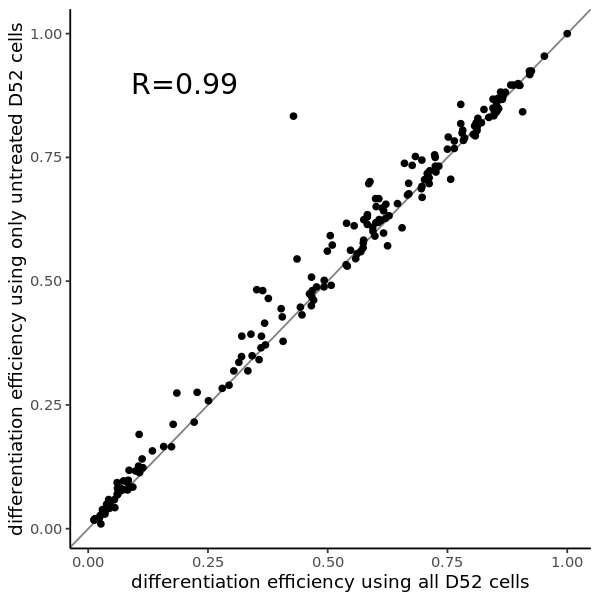

In [57]:
r = cor(df_donor_compare$avg_de1,df_donor_compare$avg_de2)
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df_donor_compare, aes(x=avg_de1,y=avg_de2)) + geom_point() + 
    xlab("differentiation efficiency using all D52 cells") + 
    ylab("differentiation efficiency using only untreated D52 cells") +
    annotate("text",x = 0.2,y=0.9,label=paste0("R=",round(r,digits =2)),size =6) +
    geom_abline(intercept = 0, alpha = 0.5) + theme_classic()

In [58]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"

In [59]:
pdf(paste0(fig_dir,"SF_9a.pdf"), width=5, height=5)
ggplot(df_donor_compare, aes(x=avg_de1,y=avg_de2)) + geom_point() + 
    xlab("differentiation efficiency using all D52 cells") + 
    ylab("differentiation efficiency using only untreated D52 cells") +
    annotate("text",x = 0.2,y=0.9,label=paste0("R=",round(r,digits =2)),size =6) +
    geom_abline(intercept = 0, alpha = 0.5) + theme_classic()
dev.off()

png 
  2